In [0]:
!wget https://www.machinehack.com/wp-content/uploads/2020/04/MetalFurnace-Participants_Data.zip

--2020-04-19 19:06:26--  https://www.machinehack.com/wp-content/uploads/2020/04/MetalFurnace-Participants_Data.zip
Resolving www.machinehack.com (www.machinehack.com)... 107.180.71.20
Connecting to www.machinehack.com (www.machinehack.com)|107.180.71.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26731 (26K) [application/zip]
Saving to: ‘MetalFurnace-Participants_Data.zip.1’

MetalFurnace-Partic 100%[===================>]  26.10K  --.-KB/s    in 0.07s   

2020-04-19 19:06:26 (358 KB/s) - ‘MetalFurnace-Participants_Data.zip.1’ saved [26731/26731]



In [0]:
!unzip MetalFurnace-Participants_Data.zip

Archive:  MetalFurnace-Participants_Data.zip
replace MetalFurnace-Participants_Data/Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: MetalFurnace-Participants_Data/Test.csv  
  inflating: __MACOSX/MetalFurnace-Participants_Data/._Test.csv  
  inflating: MetalFurnace-Participants_Data/Sample_Submission.xlsx  
  inflating: __MACOSX/MetalFurnace-Participants_Data/._Sample_Submission.xlsx  
  inflating: MetalFurnace-Participants_Data/Train.csv  
  inflating: __MACOSX/MetalFurnace-Participants_Data/._Train.csv  


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [0]:
train = pd.read_csv("MetalFurnace-Participants_Data/Train.csv")
test = pd.read_csv("MetalFurnace-Participants_Data/Test.csv")

In [0]:
train.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,-1.999287,-2.118189,0.172917,0.098853,-3.237512,0.040193,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,-2.526055,0.308879,-1.999287,-2.118189,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [0]:
train['ID']=0

In [0]:
test['ID']=1

In [0]:
ID_COL, TARGET_COL = 'ID', 'grade'
df = pd.concat([train, test]).reset_index(drop=True)

In [0]:
train, test = df.iloc[:train.shape[0]], df.iloc[train.shape[0]:]
test.reset_index(drop=True, inplace=True)
target = train[TARGET_COL]
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]

In [0]:
del train['ID']
del test['ID']

In [0]:
print(len(features))

28


In [0]:
y = train.grade
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
f0,1.00000,-0.08756,-0.29180,0.17996,-0.29690,0.18426,0.30608,-0.16668,-0.15146,nan,0.11873,0.07388,0.09832,0.02091,-0.00715,-0.02122,0.01781,-0.02057,-0.02021,-0.14219,0.02681,0.08443,0.01631,0.06364,0.06054,0.06031,-0.04496,0.01600,-0.23934
f1,-0.08756,1.00000,-0.12193,0.09013,0.33972,-0.07297,0.09803,0.02383,0.02853,nan,0.09728,-0.26366,-0.04344,0.12475,0.04569,0.02612,0.08162,0.01062,0.04825,0.02259,-0.20563,-0.28125,0.21970,-0.02492,-0.17776,0.07185,0.35957,0.02699,-0.00776
f2,-0.29180,-0.12193,1.00000,-0.80375,0.39477,-0.12742,0.15897,0.04161,0.04981,nan,0.09646,-0.04909,0.02215,0.08647,0.07979,0.04561,-0.05380,0.01855,0.08424,0.03945,-0.06466,-0.13890,0.00299,-0.04619,-0.11086,-0.03702,0.12479,0.04712,0.41909
f3,0.17996,0.09013,-0.80375,1.00000,-0.52603,0.11305,-0.13777,-0.03691,-0.04420,nan,-0.00078,0.06931,-0.06638,-0.12179,-0.07079,-0.04047,0.06931,-0.01646,-0.07475,-0.03501,0.09162,0.22096,-0.01119,0.08290,0.14658,-0.03973,-0.13433,-0.04181,-0.32832
f4,-0.29690,0.33972,0.39477,-0.52603,1.00000,0.36049,-0.10387,-0.11771,0.05676,nan,0.08730,-0.22516,0.03633,0.20229,-0.04982,-0.00837,0.05764,-0.05247,-0.03775,-0.08553,-0.11765,-0.24819,0.17478,-0.03116,-0.20017,0.11230,0.23331,0.05369,0.20137
f5,0.18426,-0.07297,-0.12742,0.11305,0.36049,1.00000,0.10244,-0.36918,0.02981,nan,0.08476,-0.13345,0.13941,0.13037,0.04775,0.02730,0.08530,-0.09025,0.05042,-0.26984,0.06442,-0.08413,0.08702,0.07449,-0.07027,0.07508,-0.02759,0.02820,-0.25574
f6,0.30608,0.09803,0.15897,-0.13777,-0.10387,0.10244,1.00000,-0.03345,-0.04005,nan,-0.14686,-0.09704,-0.00188,-0.07264,0.31883,0.16543,0.02575,-0.01491,0.32419,-0.03172,-0.04183,-0.03569,0.06908,0.05314,0.00514,-0.07521,0.06274,-0.03789,-0.24689
f7,-0.16668,0.02383,0.04161,-0.03691,-0.11771,-0.36918,-0.03345,1.00000,-0.00973,nan,-0.03569,-0.02785,-0.04947,-0.04257,-0.01559,-0.00891,-0.02785,-0.00362,-0.01646,0.70930,-0.02103,-0.08344,-0.07252,0.01896,-0.04345,-0.02452,0.02096,-0.00921,0.14791
f8,-0.15146,0.02853,0.04981,-0.04420,0.05676,0.02981,-0.04005,-0.00973,1.00000,nan,-0.04274,-0.03335,-0.05923,-0.05097,-0.01867,-0.01067,-0.03335,-0.00434,-0.01971,-0.00923,-0.02519,-0.03493,-0.02594,-0.04522,-0.02183,-0.02935,0.02510,-0.01103,0.10858
f9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['grade'], axis=1)
y = train_df['grade'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
X_trn, X_val, y_trn, y_val = X_train, X_cv, y_train, y_cv

In [0]:

clf = LGBMClassifier(learning_rate=0.01, colsample_bytree=0.3, reg_alpha=3, reg_lambda=9, max_depth=-1, n_estimators=2000, min_child_samples=15, num_leaves=141)
_ = clf.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=100, early_stopping_rounds=100)
predictions_val_lgb = clf.predict_proba(X_val)
print(f"Log loss for Model 1 is: {log_loss(y_val, predictions_val_lgb)}")

Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.659384	valid_1's multi_logloss: 0.730649
[200]	training's multi_logloss: 0.555757	valid_1's multi_logloss: 0.635129
[300]	training's multi_logloss: 0.481335	valid_1's multi_logloss: 0.564298
[400]	training's multi_logloss: 0.429417	valid_1's multi_logloss: 0.512625
[500]	training's multi_logloss: 0.391912	valid_1's multi_logloss: 0.474152
[600]	training's multi_logloss: 0.363823	valid_1's multi_logloss: 0.445272
[700]	training's multi_logloss: 0.342793	valid_1's multi_logloss: 0.423671
[800]	training's multi_logloss: 0.326192	valid_1's multi_logloss: 0.406342
[900]	training's multi_logloss: 0.31185	valid_1's multi_logloss: 0.391108
[1000]	training's multi_logloss: 0.300428	valid_1's multi_logloss: 0.378828
[1100]	training's multi_logloss: 0.291072	valid_1's multi_logloss: 0.36911
[1200]	training's multi_logloss: 0.283341	valid_1's multi_logloss: 0.361112
[1300]	training's multi_logloss: 0.2

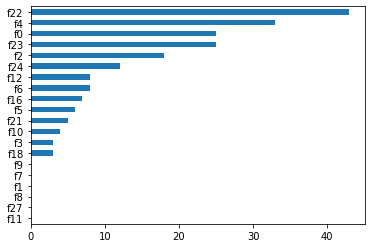

In [0]:
 fi = pd.Series(index=features, data = clf.feature_importances_)
fi.sort_values(ascending=False)[:20][::-1].plot.barh()

In [0]:
predictions_test_lgb = clf.predict_proba(X_test)

In [0]:

target_mapper = {0:'0',
1:'1',
2:'2',
3:'3',
4:'4'}
sub_df = pd.DataFrame(predictions_test_lgb)
sub_df.columns = [target_mapper[c] for c in sub_df.columns]
sub_df.to_excel("a.xlsx", index=False)

In [0]:
from google.colab import files
files.download('a.xlsx')